<a href="https://colab.research.google.com/github/gabychoi/DataJournalism/blob/main/datice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [8]:
# 한글 폰트 문제 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
import pandas as pd
import numpy as np 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# 원 데이터 불러오기
raw_data = pd.read_csv('/content/gdrive/My Drive/data/data_compensation.csv')
raw_data

구  분        연도    2010    2011  ...    2017    2018    2019    2020
0   NaN     전체 건수   6,672  15,116  ...   7,374   5,073   4,257   4,380
1   NaN   전체 보상금액  18,361  22,566  ...  36,038  36,736  40,138  41,907
2   NaN   형사보상 건수   6,649  15,097  ...   7,355   5,062   4,232   4,366
3   NaN   형사보상 금액  18,317  22,522  ...  35,934  36,704  39,812  41,651
4   NaN  피의자보상 건수      23      19  ...      19      11      25      14
5   NaN  피의자보상 금액      44      44  ...     104      32     326     256

[6 rows x 13 columns]

In [5]:
# 데이터 카피
copy_data = raw_data
copy_data

구  분        연도    2010    2011  ...    2017    2018    2019    2020
0   NaN     전체 건수   6,672  15,116  ...   7,374   5,073   4,257   4,380
1   NaN   전체 보상금액  18,361  22,566  ...  36,038  36,736  40,138  41,907
2   NaN   형사보상 건수   6,649  15,097  ...   7,355   5,062   4,232   4,366
3   NaN   형사보상 금액  18,317  22,522  ...  35,934  36,704  39,812  41,651
4   NaN  피의자보상 건수      23      19  ...      19      11      25      14
5   NaN  피의자보상 금액      44      44  ...     104      32     326     256

[6 rows x 13 columns]

In [ ]:
# 연도별 보상금 데이터프레임 생성
data = {
    "전체 건수" : [6672,	15116,	39519,	33760,	34366,	14546,	8713,	7374,	5073,	4257,	4380],
    "전체 보상금액" : [18361,	22566,	53179,	57672,	88164,	52975,	31769,	36038,	36736,	40138,	41907],
    "형사보상 건수" : [6649,	15097,	39501,	33745,	34352,	14532,	8690,	7355,	5062,	4232,	4366],
    "형사보상 금액" : [18317,	22522,	53148,	57641,	88135,	52937,	31681,	35934,	36704,	39812,	41651],
    "피의자보상 건수" : [23,	19,	18,	15,	14,	14,	23,	19,	11,	25,	14],
    "피의자보상 금액" : [44,	44,	31,	31,	29,	38,	88,	104,	32,	326,	256],
}
columns = ["전체 건수", "전체 보상금액", "형사보상 건수", "형사보상 금액", "피의자보상 건수", "피의자보상 금액"]
compen_df = pd.DataFrame(data, index=['2010',	'2011',	'2012',	'2013',	'2014',	'2015',	'2016',	'2017',	'2018',	'2019',	'2020'] , columns=columns)
compen_df

In [7]:
# 시각화 준비
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# 폰트 지정
plt.rc('font', family='NanumBarunGothic') 

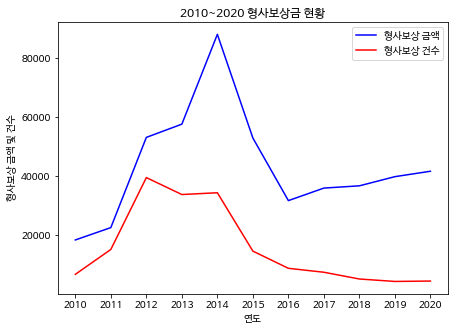

In [19]:
# 라인 그래프 생성
fig , axes = plt.subplots(figsize=(7,5))
plt.title('2010~2020 형사보상금 현황')
plt.plot(compen_df["형사보상 금액"],  c = 'b')
plt.plot(compen_df["형사보상 건수"],  c = 'r')
plt.xlabel('연도')
plt.ylabel('형사보상 금액 및 건수')
plt.legend(['형사보상 금액', '형사보상 건수'])
plt.show()